In [10]:
# A1: Importing libraries for data manipulation, plotting, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style='whitegrid')


In [16]:
# A2: Load the movie dataset (make sure CSV is in same folder or update path)
df = pd.read_csv("TMDB_movie_dataset_v11.csv")
df.head()
print(df.shape)

(1142342, 24)


In [17]:
print(df.shape)

(1142342, 24)


In [18]:
# A3: Drop rows where budget or revenue are zero and remove missing values
df = df[(df['budget'] > 0) & (df['revenue'] > 0)]
df = df[df['vote_average'].notna() & df['popularity'].notna()]
df.reset_index(drop=True, inplace=True)
df.isnull().sum()


id                         0
title                      0
vote_average               0
vote_count                 0
status                     0
release_date            1834
revenue                    0
runtime                    0
adult                      0
backdrop_path           3659
budget                     0
homepage                9716
imdb_id                 3326
original_language          0
original_title             0
overview                1339
popularity                 0
poster_path             1727
tagline                 4084
genres                  1708
production_companies    2895
production_countries    2814
spoken_languages        2406
keywords                3843
dtype: int64

In [19]:
print(df.shape)

(14325, 24)


In [5]:
# A4: Add log-transformed versions of budget and revenue + ROI + score classes
df['budget_log'] = np.log1p(df['budget'])
df['revenue_log'] = np.log1p(df['revenue'])
df['roi'] = (df['revenue'] - df['budget']) / df['budget']

def classify_score(score):
    if score < 5:
        return 'low'
    elif score < 7:
        return 'medium'
    else:
        return 'high'

df['score_class'] = df['vote_average'].apply(classify_score)
df['score_class'].value_counts()


score_class
medium    6562
low       4169
high      3594
Name: count, dtype: int64

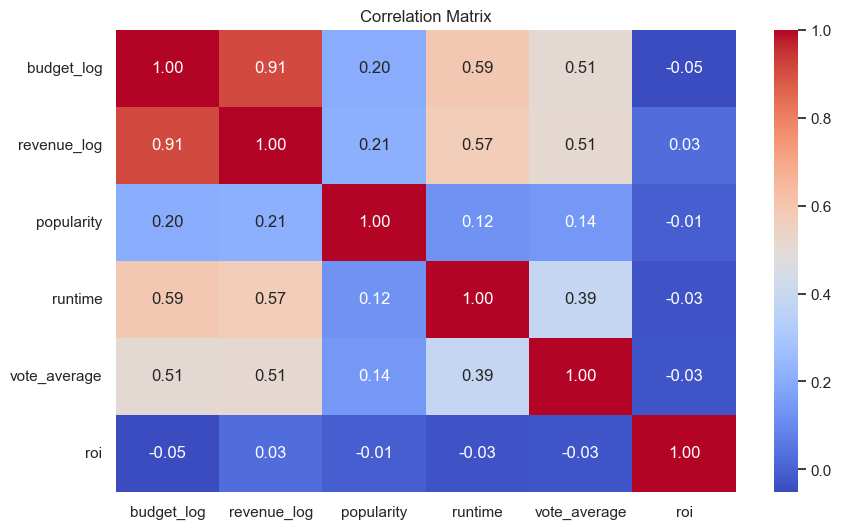

In [6]:
# A5: Correlation heatmap to visualize relationships
corr_features = ['budget_log', 'revenue_log', 'popularity', 'runtime', 'vote_average', 'roi']

plt.figure(figsize=(10, 6))
sns.heatmap(df[corr_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [7]:
# A6: Train/test split and random forest model to predict score_class
features = ['budget_log', 'revenue_log', 'popularity', 'runtime', 'roi']
X = df[features]
y = df['score_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 251  191  277]
 [  79  623  132]
 [ 131   62 1119]]
              precision    recall  f1-score   support

        high       0.54      0.35      0.43       719
         low       0.71      0.75      0.73       834
      medium       0.73      0.85      0.79      1312

    accuracy                           0.70      2865
   macro avg       0.66      0.65      0.65      2865
weighted avg       0.68      0.70      0.68      2865



In [13]:
# Random Forest Regressor to predict actual score (vote_average)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Target is now continuous: vote_average
y_reg = df['vote_average']  # regression target

# Use same features
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

# Initialize and train the regressor
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_reg, y_train_reg)

# Predict and evaluate
y_pred_reg = reg.predict(X_test_reg)

rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2 = r2_score(y_test_reg, y_pred_reg)

print("\n--- Regression Results ---")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.3f}")



--- Regression Results ---
Root Mean Squared Error (RMSE): 2.47
R² Score: 0.320


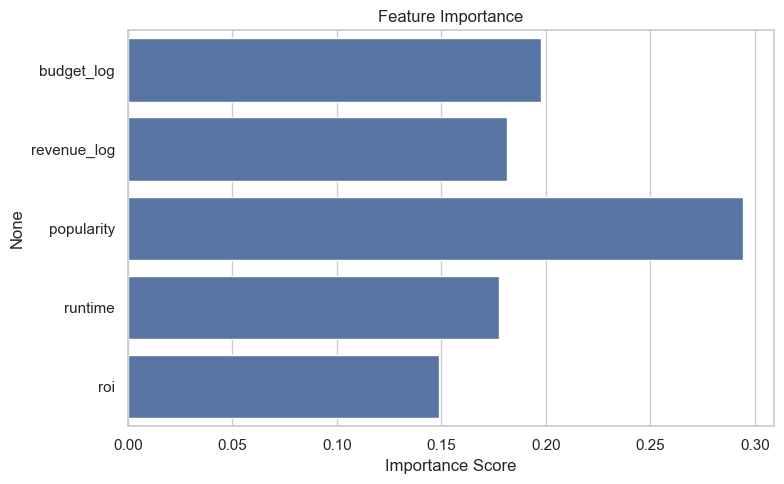

In [15]:
# A7: Plotting which features were most important to the model
importances = clf.feature_importances_
feat_names = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()
